<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2

## Contents:
- [Import and reading file](#Import-and-reading-file)
- [Modelling](#Modelling)
- [Data Dictionary](#Data-Dictionary)
- [Evaluation](#Evaluation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Codes

In [959]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

import warnings

In [960]:
#Setting default display settings
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 60)

## Import and reading file

In [961]:
#Reading housing_data.csv Files
housing_data = pd.read_csv('../Code/housing_data.csv' )
housing_data.head()


,id,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,garage_cars,garage_area,saleprice,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,109,6,1976,2005,289.0,2,533.0,725.0,725,1479,2,2,6,0,2.0,475.0,130500,34,0,1,0,0,0,0,0,1,0,0
1,544,7,1996,1997,132.0,2,637.0,913.0,913,2122,2,2,8,1,2.0,559.0,220000,13,0,0,1,0,0,0,0,1,0,0
2,153,5,1953,2007,0.0,1,731.0,1057.0,1057,1057,1,2,5,0,1.0,246.0,109000,57,0,1,0,0,0,0,0,0,1,0
3,318,5,2006,2007,0.0,1,0.0,384.0,744,1444,2,1,7,0,2.0,400.0,174000,4,0,0,1,0,0,0,0,0,1,0
4,255,6,1900,1993,0.0,1,0.0,676.0,831,1445,2,1,6,0,2.0,484.0,138500,110,0,0,1,0,0,0,0,0,1,0


In [962]:
#Reading testHousing_data.csv Files
testHousing_data = pd.read_csv('../Code/testHousing_data.csv' )
testHousing_data.head()


,id,overall_qual,year_built,year_remod/add,mas_vnr_area,exter_qual,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,full_bath,kitchen_qual,totrms_abvgrd,fireplaces,garage_cars,garage_area,lifespan,foundation_BrkTil,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone
0,2658,6,1910,1950,0.0,1,0,1020,908,1928,2,0,9,0,1,440,96,0,0,0,0,1,0,0,0,1,0
1,2718,5,1977,1977,0.0,1,0,1967,1967,1967,2,1,10,0,2,580,29,0,1,0,0,0,0,0,0,1,0
2,2414,7,2006,2006,0.0,2,554,654,664,1496,2,2,7,1,2,426,0,0,0,1,0,0,0,0,0,1,0
3,1989,5,1923,2006,0.0,2,0,968,968,968,1,1,5,0,2,480,84,0,1,0,0,0,0,0,0,1,0
4,625,6,1963,1963,247.0,1,609,1394,1394,1394,1,1,6,2,2,514,46,0,1,0,0,0,0,0,1,0,0


In [963]:
housing_data.isnull().sum()

id                      0
overall_qual            0
year_built              0
year_remod/add          0
mas_vnr_area            0
exter_qual              0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
kitchen_qual            0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
saleprice               0
lifespan                0
foundation_BrkTil       0
foundation_CBlock       0
foundation_PConc        0
foundation_Slab         0
foundation_Stone        0
foundation_Wood         0
mas_vnr_type_BrkCmn     0
mas_vnr_type_BrkFace    0
mas_vnr_type_None       0
mas_vnr_type_Stone      0
dtype: int64

In [964]:
testHousing_data.isnull().sum()

id                      0
overall_qual            0
year_built              0
year_remod/add          0
mas_vnr_area            0
exter_qual              0
bsmtfin_sf_1            0
total_bsmt_sf           0
1st_flr_sf              0
gr_liv_area             0
full_bath               0
kitchen_qual            0
totrms_abvgrd           0
fireplaces              0
garage_cars             0
garage_area             0
lifespan                0
foundation_BrkTil       0
foundation_CBlock       0
foundation_PConc        0
foundation_Slab         0
foundation_Stone        0
foundation_Wood         0
mas_vnr_type_BrkCmn     0
mas_vnr_type_BrkFace    0
mas_vnr_type_None       0
mas_vnr_type_Stone      0
dtype: int64

In [965]:
housing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2029 non-null   int64  
 1   overall_qual          2029 non-null   int64  
 2   year_built            2029 non-null   int64  
 3   year_remod/add        2029 non-null   int64  
 4   mas_vnr_area          2029 non-null   float64
 5   exter_qual            2029 non-null   int64  
 6   bsmtfin_sf_1          2029 non-null   float64
 7   total_bsmt_sf         2029 non-null   float64
 8   1st_flr_sf            2029 non-null   int64  
 9   gr_liv_area           2029 non-null   int64  
 10  full_bath             2029 non-null   int64  
 11  kitchen_qual          2029 non-null   int64  
 12  totrms_abvgrd         2029 non-null   int64  
 13  fireplaces            2029 non-null   int64  
 14  garage_cars           2029 non-null   float64
 15  garage_area          

In [966]:
testHousing_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    878 non-null    int64  
 1   overall_qual          878 non-null    int64  
 2   year_built            878 non-null    int64  
 3   year_remod/add        878 non-null    int64  
 4   mas_vnr_area          878 non-null    float64
 5   exter_qual            878 non-null    int64  
 6   bsmtfin_sf_1          878 non-null    int64  
 7   total_bsmt_sf         878 non-null    int64  
 8   1st_flr_sf            878 non-null    int64  
 9   gr_liv_area           878 non-null    int64  
 10  full_bath             878 non-null    int64  
 11  kitchen_qual          878 non-null    int64  
 12  totrms_abvgrd         878 non-null    int64  
 13  fireplaces            878 non-null    int64  
 14  garage_cars           878 non-null    int64  
 15  garage_area           8

In [967]:
housing_data.shape

(2029, 28)

In [968]:
testHousing_data.shape

(878, 27)

**Summary**

For the data imported, there were a few findings:
1. housing_data consist of 2029 rows and 28 columns while testHousing_data consist of 878 rows and 27 columns. 
    - The difference in row between the two dataset is that testHousing_data does not have a SalesPrice columns as we are suppose to predict the saleprice using regression model 
    - There are no null values in both the train and test housing dataset.
    
   
    
2. Both files contains a mixture of integer and float data types.
3. Note that we kept ID in the dataset as it is required for kaggle submission even though ID doesn't add any contribution to the housing prices.




## Additional Method to improve model prediction

In [ ]:
import pandas as pd 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandonforestRegressor



## Train Test Split

In [969]:
#Creating Features Matrix (X) and target vector (y)
features = [col for col in housing_data._get_numeric_data().columns if col != 'saleprice']
X = housing_data[features]
y = housing_data['saleprice']

In [970]:
print('X: ', X.shape)
print('y: ', y.shape)

X:  (2029, 27)
y:  (2029,)


In [971]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)


In [972]:
#After splitting the data (75/25)
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)

X_train:  (1623, 27)
y_train:  (1623,)
X_test:  (406, 27)


## Model Prep: Scaling

In [973]:
#Scaling data from housing_data(train.csv)
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)


## Obtaining Lasso Regression Alpha

In [974]:
#Optimizing Lasso Regression alpha
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose =1)
optimal_lasso.fit(X_train, y_train)

print(optimal_lasso.alpha_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

681.6223782457806


........................................................................................................................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.3s finished


In [975]:
#Cross Validate Lasso R^2 with optimal alpha
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

print(lasso_scores)

[0.88321958 0.87711211 0.82915502 0.83609803 0.86226168 0.4700271
 0.8226267  0.85293928 0.65330639 0.85146036]


## Obtaining Ridge Regression Alpha

In [976]:
#Optimal value for Ridge regression alpha
%time
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)

print (optimal_ridge.alpha_)

CPU times: user 14 µs, sys: 0 ns, total: 14 µs
Wall time: 4.05 µs
243.74441501222216


In [977]:
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)
print(ridge_scores)

[0.87610332 0.87404182 0.83164512 0.83410764 0.86664487 0.49563038
 0.81766509 0.85749259 0.65725258 0.84956987]


## Cross Validation Result


In [978]:
#Lasso R^2 And MSE Score comparision
print('Lasso Cross Validation avg score: ',lasso_scores.mean())
lasso_scores_mse = -cross_val_score(lasso, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print ('Lasso Cross Validation MSE score: ',lasso_scores_mse)

Lasso Cross Validation avg score:  0.7938206247898204
Lasso Cross Validation MSE score:  34418.080548056736


In [979]:
#Ridge R^2 and MSE score comparision
print('Ridge Cross Validation avg score: ',ridge_scores.mean())
ridge_scores_mse = -cross_val_score(ridge, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print ('Ridge Cross Validation MSE score: ',ridge_scores_mse)

Ridge Cross Validation avg score:  0.7960153275128828
Ridge Cross Validation MSE score:  34359.40580487651


In [980]:
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
print('Linear Cross Validation Score: ',lr_scores.mean())
lr_scores_mse = -cross_val_score(lr, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print ('Linear Cross Validation MSE score: ',lr_scores_mse)


Linear Cross Validation Score:  0.7950715869069226
Linear Cross Validation MSE score:  34417.362433265735


**Observations**

1. The train and test data are split according to 75/15 ratio. 
2. Looking at the cross validation result among the three regression, Ridge regression stands to have the highest score and lowest Mean squared error among all three model. As a result, we will be using Ridge model for predictions. 


## Model Fitting

### Fitting Ridge regression (Highest CV score)

In [981]:
#Fitting Ridge Regression
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test) 
print('Ridge R^2 Train Score: ', r2_score(y_train,ridge.predict(X_train)))
print('Ridge R^2 Test Score: ',r2_score(y_test,ridge_pred))

Ridge R^2 Train Score:  0.8153277176826459
Ridge R^2 Test Score:  0.8430967815845637


In [982]:
### Checking the Mean Squared Error for Ridge train and test set
print('Ridge RMSE Train: ',mean_squared_error(y_train, ridge.predict(X_train),squared=False))
print('Ridge RMSE Test: ', mean_squared_error(y_test, ridge_pred,squared=False))


Ridge RMSE Train:  34006.97458413184
Ridge RMSE Test:  30676.693948816865


### Fitting Linear Regression
 (Added for educational purpose)

In [983]:
#Fitting Linear regression
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('Lr R^2 Train score: ', r2_score(y_train,lr.predict(X_train)))
print('Lr R^2 Test score: ', r2_score(y_test,lr_pred))

Lr R^2 Train score:  0.8184319337497874
Lr R^2 Test score:  0.8451845117292868


In [984]:
#Checking the Root Mean Squared Error for Linear train and test set
print('Linear RMSE Train: ', mean_squared_error(y_train, lr.predict(X_train),squared=False))
print('Linear RMSE Test: ', mean_squared_error(y_test, lr_pred,squared=False))

Linear RMSE Train:  33719.946171665106
Linear RMSE Test:  30471.920806822498


### Fitting Lasso regression
 (Added for educational purpose)

In [985]:
#Fitting Lasso regression (Can break this into smaller print out)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print('Lasso R^2 Train score: ',r2_score(y_train, lasso.predict(X_train)))
print('Lasso R^2 Test score: ',r2_score(y_test, lasso_pred))


Lasso R^2 Train score:  0.8168222817779676
Lasso R^2 Test score:  0.8450243632711133


In [986]:
#Checking the Root Mean Squared Error for Lasso train and test set
print('Lasso RMSE Train: ', mean_squared_error(y_train, lasso.predict(X_train),squared=False))
print('Lasso RMSE Test: ', mean_squared_error(y_test, lasso_pred,squared=False))

Lasso RMSE Train:  33869.084765255146
Lasso RMSE Test:  30487.677530545392


In [987]:
housing_data['saleprice'].mean()

182631.80187284376

**Observation**

1. All three regression model R^2 test score is above 80% which is above the threshold requirement. 
2. The difference between train and test accuracy of less than 0.03 which indicates that the model is quite accuracy in its predictions against actual sales price. 
3. The Root Mean Squared Error (RSME) results indicates the range vlaue of prediction error. This means that the possible error in value is around 3400 from its mean. (The lower the better as it would indicates that the value of prediction error is small) 
4. For our selected Ridge regression model, it scored an accuracy (R^2) of 84.3% with a RSME score of 30676. 
    - This indicates a very high accruacy of our machine learning predictive model with the range error to be around 16% (RMSE/Saleprice mean = 30676/182631). 
    - This indicates that for every Sales price prediction, there will be a +/- 30676 potential range error ontop of the saleprice. 


## Data Dictionary:

|Method|R2 Score|RMSE Score|
|---|---|---| 
|Ridge Regression - Train|0.8153|34006|
|**Ridge Regression - Test**|**0.8430**|**30676**|
|Lasso Regression - Train|0.8168|33869| 
|Lasso Regression - Test|0.8450|30487|
|Linear Regression - Train|0.8184|33719|
|Linear Regression - Test|0.8451|30471|


## Evaluation

In [988]:
#Sorting top 10 feature that can affect salesprice
ridge_coefs = pd.DataFrame({'variable': X.columns,
                            'coef': ridge.coef_,
                            'abs_coef': abs(ridge.coef_)})
ridge_coefs.sort_values('abs_coef',inplace=True, ascending=False)
ridge_coefs.head(10)

,variable,coef,abs_coef
1,overall_qual,15548.653973,15548.653973
9,gr_liv_area,11439.226907,11439.226907
5,exter_qual,9201.686978,9201.686978
11,kitchen_qual,8939.544767,8939.544767
4,mas_vnr_area,8120.660915,8120.660915
6,bsmtfin_sf_1,6993.743619,6993.743619
13,fireplaces,6737.033712,6737.033712
12,totrms_abvgrd,5346.698728,5346.698728
8,1st_flr_sf,5113.138217,5113.138217
15,garage_area,5054.617357,5054.617357


In [989]:
#Not applicable as we used Ridge regression(use for lasso)
#print('Percent variables zeroed out: ', np.sum((ridge.coef_==0))/float(X.shape[0]))


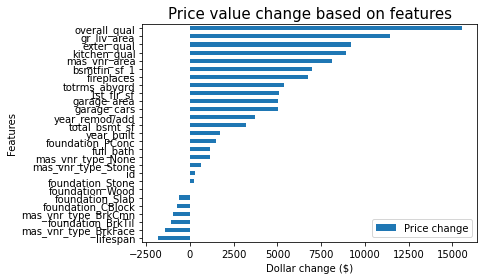

In [990]:
ridge_coef = pd.DataFrame(ridge.coef_,index=features)

ridge_coef.columns = ['Price change']
ridge_coef.sort_values('Price change', ascending=True, inplace = True)
ridge_coef.plot(kind='barh')
plt.title('Price value change based on features', size=15)
plt.xlabel('Dollar change ($)')
plt.ylabel('Features')
plt.show()


#Displaying the Correlation coefficient of the features
#pd.Series(ridge.coef_, index=features).plot.barh(figsize=(15,7))


**Observation** 

After predicting the price, we can also evaluate the coefficient of the Ridge model to determine which are the top features that could affect the sales price. As we look at the table, a unit movement of Overall Quality would result in a shift of $19,461 in the saleprice. This is because there is a high positive correlation between the overall qualities of the house against the sales price. 

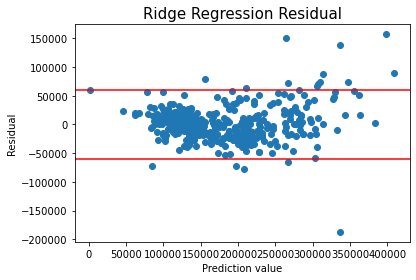

In [991]:
#Creating residual for lasso 
residual_ridge = y_test - ridge_pred
fig,ax = figsize=(10,10)
plt.scatter(x=ridge_pred,y=residual_ridge)
plt.title('Ridge Regression Residual', size=15)
plt.xlabel('Prediction value')
plt.ylabel('Residual')
plt.axhline(60000, color ='red')
plt.axhline(-60000,color='red')
plt.show()


**Observations**

1. As we look at the price difference between predicted value and acutual value at each prediction value for housing prices using the Ridge regression model, we can see that most of prediction falls within +/- 60,000 or +/- 1 standard deviation from the mean. 
2. Most of the prediction below \\$250,000 have large amount of residual near 0 as compared to higher property values.
3. We can clearly see that the residual starts to increase when the predicted value is above $250,000
4. This indicates that our model were able to predict the price range very closely to the mean with a small amount of outliers. 

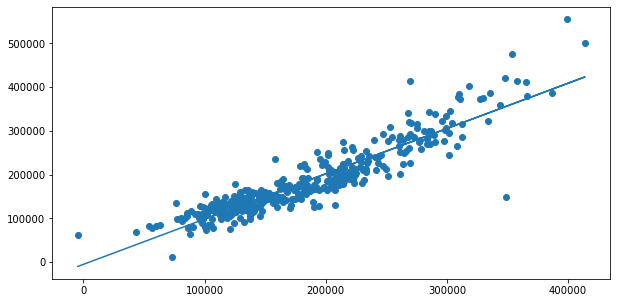

In [992]:
#True Value scatter plot
plt.figure(figsize=(10,5))
plt.scatter(x=lasso_pred, y=y_test)

m,b = np.polyfit(lasso_pred,y_test,1)
plt.plot(lasso_pred, m*lasso_pred+b)
plt.show()

**Summary**

The residual scatterplot and the true value scatterplot is slightly different. As the Residual scatterplot is used to determine the predicted price against the **different** between predicted price and actual price. 

While for true value scatter plot, we are displaying both predicted price and actual value. Then i include the line of best fit to show how far each plot is away from the mean. Ideally what i want to see is majority of the plots to be close to the line with little to no outliers. So for the scatterplot, we can clearly see that for saleprice below 300k are generally very close to the line. While the amount above 300k have a larger spread between the plot and the line. This could be due to lack of data for saleprice above 350k.




## Model Prep: 
Scaling and Prediction for testHousing_data for kaggle submission

In [993]:
housing_data.shape

(2029, 28)

In [994]:
testHousing_data.shape

(878, 27)

In [995]:
#Scaling data from testHousing_data (test.csv)
test_s = ss.transform(testHousing_data) 



As i've already fit the scaling model with the housing_data (train.csv) set, I would only need to apply scaling tranform on the test data to ensure that the scaling is similar. 

In [996]:
#Model predictions for testHousing_data(test.csv)
y_prediction = ridge.predict(test_s)
y_prediction.shape

(878,)

While most of the modelling above are done for the housing_data(train.csv) set, i would also need to apply the same scaling, model predictions as well as little adjustments for missing values to ensure i can use the model to predict the actual test dataset (testHousing_data or test.csv)

In [997]:
#Passing the y_predictions into a dataframe
saleprice_predict = pd.DataFrame(y_prediction, columns=['saleprice'])
saleprice_id = pd.DataFrame(testHousing_data['id'])

final_saleprice = pd.concat([saleprice_id,saleprice_predict], axis=1)

#Converting to CSV file 
final_saleprice.to_csv('final_saleprice.csv', index=False)




Last but not least, i will predict the sales price from the testhousing_data(test.csv) dataset on a dataframe and concatenate the ID to the salesprice. Next i will export the dataframe into csv file where i would upload the csv file on kaggle. 

## Conclusion and recommendation 

**Conclusion**

Features such as overall condition of the property, ground living area, external quality, kitchen quality and Masonry veneer area are highly correlated to the sales price. This indicates that generally buyers/sellers who focus on these aspect have a higher chance in selling the property at a higher price. While the 3 regression model were able to predict price at a high accruacy, there is a requirement to obtain more data and constantly update the features as more and more young adults are becoming homebuyers which may have a different view of features in relation to features. On top of that, although the accruacy is above benchmark of 80%, collection of more data may help in providing more insight leading to better results. Homesellers who aims to sell the house can also be remainded that the long the property is held without remodifications, the lower the future salesprice they might receive. 

**Recommendation**

- Sellers of the property is to look into the key features that could result in selling the properties at a higher price. 
- While for speculative buyers, they can look into features that leads to a lower sales price and focus on remodifying the key features  in hope for a good chance to flip the property at a profit. 

- I would also recommend for the data collection to make the answers for survey/data entry mandatory to avoid having a large amount of empty values which might lead to low correlation/skewed result. 

- I would also include interest rates data/government intervention(eg: ABSD for Singapore) to see if there is a strong correlation between higher mortgage rates with lower property price. The rational for such idea is to see if higher mortgage rate would reduce the demand of properties which may lead to a drop in prices. 


